## Exploratory Data Analysis:
- EDA stands for **Exploratory Data Analysis**. It is the **initial step** in the data analysis process where you **explore and understand the dataset**, its **structure, relationships, and underlying patterns** — before applying any machine learning models or advanced analytics.

### Goals of EDA:
1. Understand the dataset — structure, data types, distributions.
2. Detect anomalies — missing values, outliers, duplicates.
3. Uncover relationships — correlations between variables.
4. Validate assumptions — about data types, ranges, categories.
5. Guide further analysis — modeling, feature selection, transformations.

In [1]:
import pandas as pd
data = pd.read_csv('ikea.csv', index_col = 0)

In [2]:
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


### Column description
| Column Name         | Description                                                         |
| ------------------- | ------------------------------------------------------------------- |
| `Unnamed: 0`        | Index column, can be ignored.                                       |
| `item_id`           | Unique identifier for each item.                                    |
| `name`              | Product name.                                                       |
| `category`          | Category of the item (e.g., Bar furniture).                         |
| `price`             | Current price of the product.                                       |
| `old_price`         | Previous price (often "No old price").                              |
| `sellable_online`   | Whether the item is available for online purchase (`True`/`False`). |
| `link`              | URL to the product page.                                            |
| `other_colors`      | Whether the product is available in other colors (`Yes`/`No`).      |
| `short_description` | Brief description of the item.                                      |
| `designer`          | Name of the product designer.                                       |
| `depth`             | Depth in cm (many missing values).                                  |
| `height`            | Height in cm (many missing values).                                 |
| `width`             | Width in cm (many missing values).                                  |


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [4]:
data.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [5]:
data.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [6]:
data.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width'],
      dtype='object')

In [7]:
data.shape

(3694, 13)

In [8]:
data.size

48022

# Label Ecoding on 'other_colors' Series and 'sellable_online' Series

 * Converting each unique value in the sellable_online, other_colors columns into an integer value based on alphabetical order using label encoding
 
 * sellable_online - True = 1, False = 0
 
 * other_colors - No = 0,  Yes = 1

# 'old_price' Series Cleaning
* Converting 'No old price' values in old_price Series into NaN
* removing 'SR' currency denoted before the old price values in the same column
* Further converting the entire series into numeric dtype
* Lastly, filling the null values with the average of the series

In [59]:
data = data.replace('No old price', 'NaN')

In [10]:
import re
data['old_price'] = data['old_price'].apply(lambda row: re.sub("[^0-9,NaN]", "", row))

In [11]:
data['old_price'] = pd.to_numeric(data['old_price'], errors = 'coerce')
data

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,NaN,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,NaN,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,NaN,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,NaN,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,NaN,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,820.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,NaN,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,NaN,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,NaN,True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


In [12]:
data['old_price'] = data['old_price'].fillna(data.old_price.mean())

In [13]:
data.old_price.isnull().sum()

np.int64(0)

In [14]:
data.old_price

0       450.098413
1       450.098413
2       450.098413
3       450.098413
4       450.098413
           ...    
3689    820.000000
3690    450.098413
3691    450.098413
3692    450.098413
3693    450.098413
Name: old_price, Length: 3694, dtype: float64

# Dropping Columns
* Links of the products and their various descriptions  are of little use while visualising, hence droppping the respective columns
* Further dropping item_id, name, designer columns for better visualization

In [15]:
data = data.drop(['link', 'short_description', 'item_id', 'designer', 'name'], axis = 1)

#  Null Values
* Filling the NaN/ Null values in the columns 'depth', 'width' and 'height' with their average values

In [16]:
data.isna().sum()

category              0
price                 0
old_price             0
sellable_online       0
other_colors          0
depth              1463
height              988
width               589
dtype: int64

In [60]:
data['depth'] = data.depth.fillna(data.depth.median())

In [61]:
data['width'] = data.width.fillna(data.width.median())

In [62]:
data['height'] = data.height.fillna(data.height.mean())

In [63]:
data

,type,price,oldrate,is_online,color_options,depth,height,width
0,Bar furniture,265.0,450.098413,True,No,54.379202,99.00000,51.000000
1,Bar furniture,995.0,450.098413,False,No,54.379202,105.00000,80.000000
2,Bar furniture,2095.0,450.098413,False,No,54.379202,101.67997,104.470853
3,Bar furniture,69.0,450.098413,True,Yes,50.000000,100.00000,60.000000
4,Bar furniture,225.0,450.098413,True,No,60.000000,43.00000,74.000000
...,...,...,...,...,...,...,...,...
3689,Wardrobes,750.0,820.000000,True,No,50.000000,101.67997,91.000000
3690,Wardrobes,1572.0,450.098413,True,No,50.000000,101.67997,135.000000
3691,Wardrobes,924.0,450.098413,True,No,50.000000,101.67997,175.000000
3692,Wardrobes,2745.0,450.098413,True,No,50.000000,101.67997,178.000000


In [21]:
data.isnull().sum()

category           0
price              0
old_price          0
sellable_online    0
other_colors       0
depth              0
height             0
width              0
dtype: int64

# Changing the Column Names

In [22]:
data.columns = data.columns.str.replace('old_price', 'oldrate')
data.columns = data.columns.str.replace('sellable_online', 'is_online')
data.columns = data.columns.str.replace('other_colors', 'color_options')
data.columns = data.columns.str.replace('category', 'type')

# data.rename(columns={
#     'old_price': 'oldrate',
#     'sellable_online': 'is_online',
#     'other_colors': 'color_options',
#     'category': 'type'
# }, inplace=True)


In [23]:
data.head()

,type,price,oldrate,is_online,color_options,depth,height,width
0,Bar furniture,265.0,450.098413,True,No,54.379202,99.00000,51.000000
1,Bar furniture,995.0,450.098413,False,No,54.379202,105.00000,80.000000
2,Bar furniture,2095.0,450.098413,False,No,54.379202,101.67997,104.470853
3,Bar furniture,69.0,450.098413,True,Yes,50.000000,100.00000,60.000000
4,Bar furniture,225.0,450.098413,True,No,60.000000,43.00000,74.000000


Since there are 3694 rows consisting of different categories of products, it may not be viable to plot or the graphs may be misleading/ambiguous.

# GroupBy
* Before plotting, grouping of the categories is required.
* Grouping the different categories by sum()/suming them up

Using this dataframe to Visualise and Analyse
* The most meaningful column here is 'type' but it would be converted into index as a consequence of grouping. 
* Resetting the index will help here

In [68]:
data1 = data.groupby(data['type']).sum()

data1.transpose()

df = data1.reset_index()

df.oldrate = df.oldrate.round(2)
df.depth = df.depth.round(2)
df.height = df.height.round(2)
df.width = df.width.round(2) 
#df.drop(["color_options"],axis=1,inplace=True)
df

,type,price,oldrate,is_online,color_options,depth,height,width
0,Bar furniture,31939.0,21814.23,44,NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,2354.58,4635.16,3003.71
1,Beds,342666.0,94769.58,205,NoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNo...,13581.40,18192.68,28669.83
2,Bookcases & shelving units,284640.0,246459.53,547,NoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYes...,21892.02,68723.08,58279.37
3,Cabinets & cupboards,230392.6,132416.46,291,NoYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesY...,11876.86,32388.16,29040.95
4,Café furniture,14401.0,11917.26,26,NoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNo...,1279.55,2187.72,1663.35
5,Chairs,504536.6,210821.09,477,NoNoYesYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNo...,27906.98,41703.87,35346.32
6,Chests of drawers & drawer units,76522.5,57178.55,125,NoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoN...,5923.52,9857.36,9583.00
7,Children's furniture,33822.0,55326.81,119,NoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoN...,5816.38,10077.68,8060.83
8,Nursery furniture,38185.0,43774.35,93,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo...,4529.76,8446.84,6435.88
9,Outdoor furniture,185722.6,95381.80,216,YesNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoN...,13185.47,18533.80,19824.60


In [25]:
# Group by 'type' and calculate the sum
grouped_data = data.groupby('type').sum().reset_index()

# Round specific numeric columns to 2 decimal places
columns_to_round = ['oldrate', 'depth', 'height', 'width']
grouped_data[columns_to_round] = grouped_data[columns_to_round].round(2)

# Optional: Uncomment to drop 'color_options' column
grouped_data.drop(columns=['color_options'], inplace=True)

# Final result
grouped_data

,type,price,oldrate,is_online,depth,height,width
0,Bar furniture,31939.0,21814.23,44,2354.58,4635.16,3003.71
1,Beds,342666.0,94769.58,205,13581.40,18192.68,28669.83
2,Bookcases & shelving units,284640.0,246459.53,547,21892.02,68723.08,58279.37
3,Cabinets & cupboards,230392.6,132416.46,291,11876.86,32388.16,29040.95
4,Café furniture,14401.0,11917.26,26,1279.55,2187.72,1663.35
5,Chairs,504536.6,210821.09,477,27906.98,41703.87,35346.32
6,Chests of drawers & drawer units,76522.5,57178.55,125,5923.52,9857.36,9583.00
7,Children's furniture,33822.0,55326.81,119,5816.38,10077.68,8060.83
8,Nursery furniture,38185.0,43774.35,93,4529.76,8446.84,6435.88
9,Outdoor furniture,185722.6,95381.80,216,13185.47,18533.80,19824.60


In [26]:
data2 = data.groupby('type')[data.select_dtypes(include='number').columns].mean()
dff = data2.reset_index()
dff

,type,price,oldrate,depth,height,width
0,Bar furniture,679.553191,464.132590,50.097533,98.620418,63.908692
1,Beds,1647.432692,455.623001,65.295194,87.464800,137.835719
2,Bookcases & shelving units,519.416058,449.743674,39.948949,125.407075,106.349211
3,Cabinets & cupboards,789.015753,453.481018,40.674165,110.918350,99.455311
4,Café furniture,553.884615,458.356288,49.213478,84.143072,63.975164
5,Chairs,1048.932640,438.297482,58.018665,86.702441,73.485070
6,Chests of drawers & drawer units,612.180000,457.428368,47.388134,78.858880,76.664000
7,Children's furniture,272.758065,446.183948,46.906259,81.271607,65.006654
8,Nursery furniture,393.659794,451.281951,46.698508,87.080821,66.349314
9,Outdoor furniture,859.826852,441.582393,61.043846,85.804618,91.780560


df - DataFrame grouped by Product Category by Summing 

dff - DataFrame grouped by Product Category by Averaging

# Exploratory Data Analysis and Visualization

In [27]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [28]:
data2 = data.groupby('type')[data.select_dtypes(include='number').columns].mean()
dff = data2.reset_index()

In [29]:
data1 = data.groupby(data['type']).sum()
df = data1.reset_index()

# Understanding the dataset through graphs

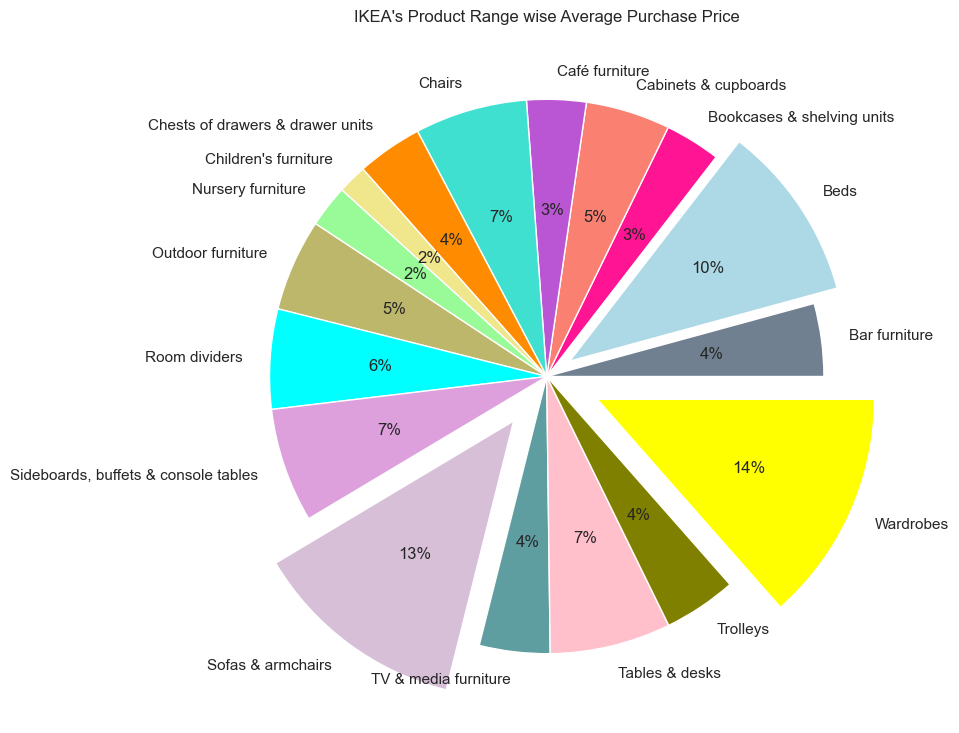

In [70]:
x = dff.price
fig, ax = plt.subplots(figsize=(25, 9))

explode = [0,0.1,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0,0.2]
colors = ['slategrey', 'lightblue','deeppink', 'salmon', 'mediumorchid', 'turquoise','darkorange','khaki', 'palegreen','darkkhaki','cyan','plum','thistle','cadetblue','pink','olive','yellow']

ax.pie(x, labels=dff.type, autopct='%.0f%%',explode = explode, colors = colors)
ax.set_title("IKEA's Product Range wise Average Purchase Price")

plt.show();

* IKEA's Wardrobes, Sofas & Armchairs, Beds are a bit expensive when compared to other poducts in their furniture range, these products can contribute well to the revenue as their purchase price is high. 
* The Average Purchase Price of IKEA's Nursery furniture, Children's furniture, Cafe furniture, Books & Shelving units are very inexpensive and affordable.

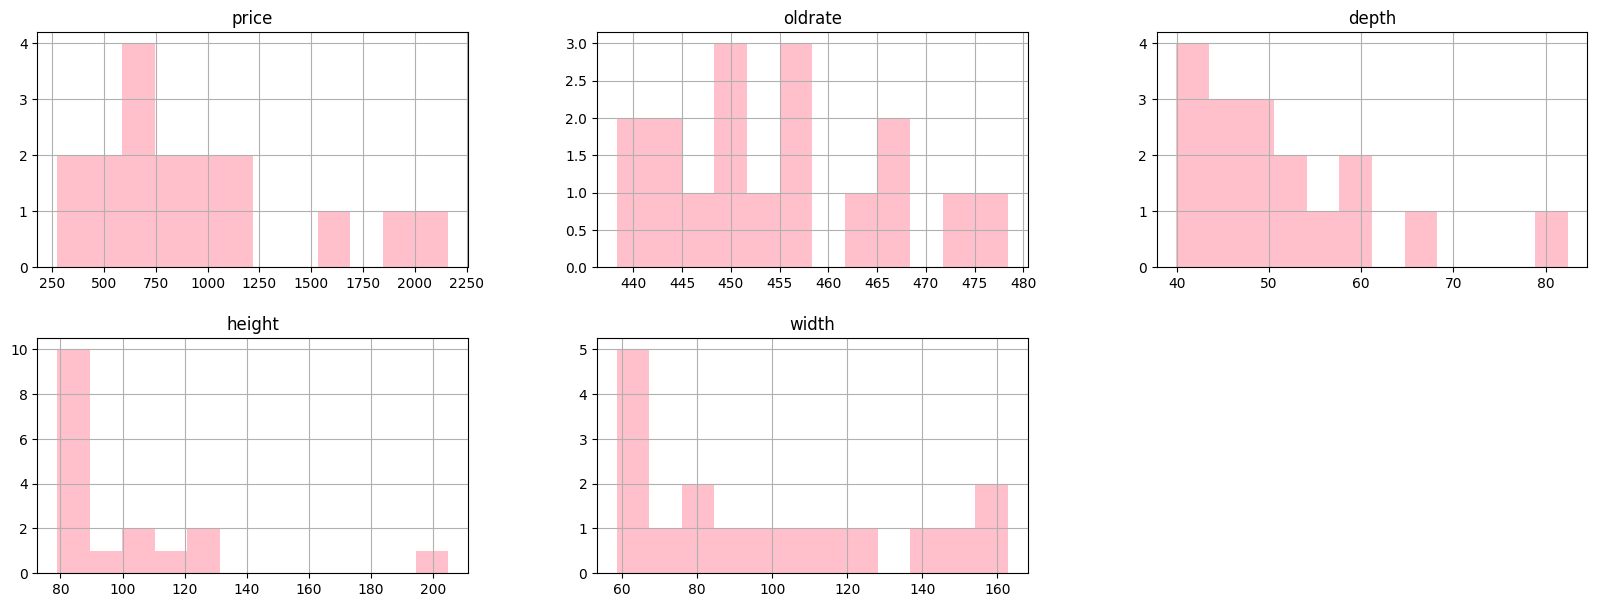

In [31]:
dff.hist(color = 'pink', alpha = 1, bins=12, layout = (3,3), figsize = (20,11));

# Analysis
##### This graph is just to get a rough idea about the Series of this DataFrame.
Later in the book, all the graphs are plotted in detail.

#####    1,2. Present & Previous Purchase Prices
* Current Average Purchase price of each product of IKEA's furniture nearly costs around 250 rupees - 1,250 rupees; 

while the Old Rates of the same product range costed around 440 rupees - 458 rupees and few others costed around.

#####    3. Online Availability of Products
* Products are available online but it is not clear as to how many in number are available online.

#####    4. Color Options Availability
* Color options for the furniture products are available.
In-depth analysis is made later in this notebook for the color availability of the products.

#####    5. Distance between the end and the beginning part of an object
* Although the Average Depth of the products falls in range of 40-65, maximum number of products can be seen having depth at 40-45

#####    6. Vertical Distance from the top to the object’s base
* The Heights of the products are ranging between 80-120m, most of them falling in between 80-90m

##### 7. Measure of the product side to side
* Mean Width of the products ranged from 60 - 160,
with highest number of products having a mean width of 60

In [32]:
data1

,price,oldrate,is_online,color_options,depth,height,width
type,,,,,,,
Bar furniture,31939.0,21814.231746,44,NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,2354.584043,4635.159645,3003.708535
Beds,342666.0,94769.584127,205,NoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNo...,13581.400269,18192.678492,28669.829630
Bookcases & shelving units,284640.0,246459.533333,547,NoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYes...,21892.024204,68723.076866,58279.367794
Cabinets & cupboards,230392.6,132416.457143,291,NoYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesY...,11876.856118,32388.158167,29040.950725
Café furniture,14401.0,11917.263492,26,NoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNo...,1279.550426,2187.719882,1663.354267
Chairs,504536.6,210821.088889,477,NoNoYesYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNo...,27906.978037,41703.874353,35346.318519
Chests of drawers & drawer units,76522.5,57178.546032,125,NoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoN...,5923.516809,9857.359941,9583.000000
Children's furniture,33822.0,55326.809524,119,NoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoN...,5816.376065,10077.679231,8060.825121
Nursery furniture,38185.0,43774.349206,93,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo...,4529.755267,8446.839616,6435.883414


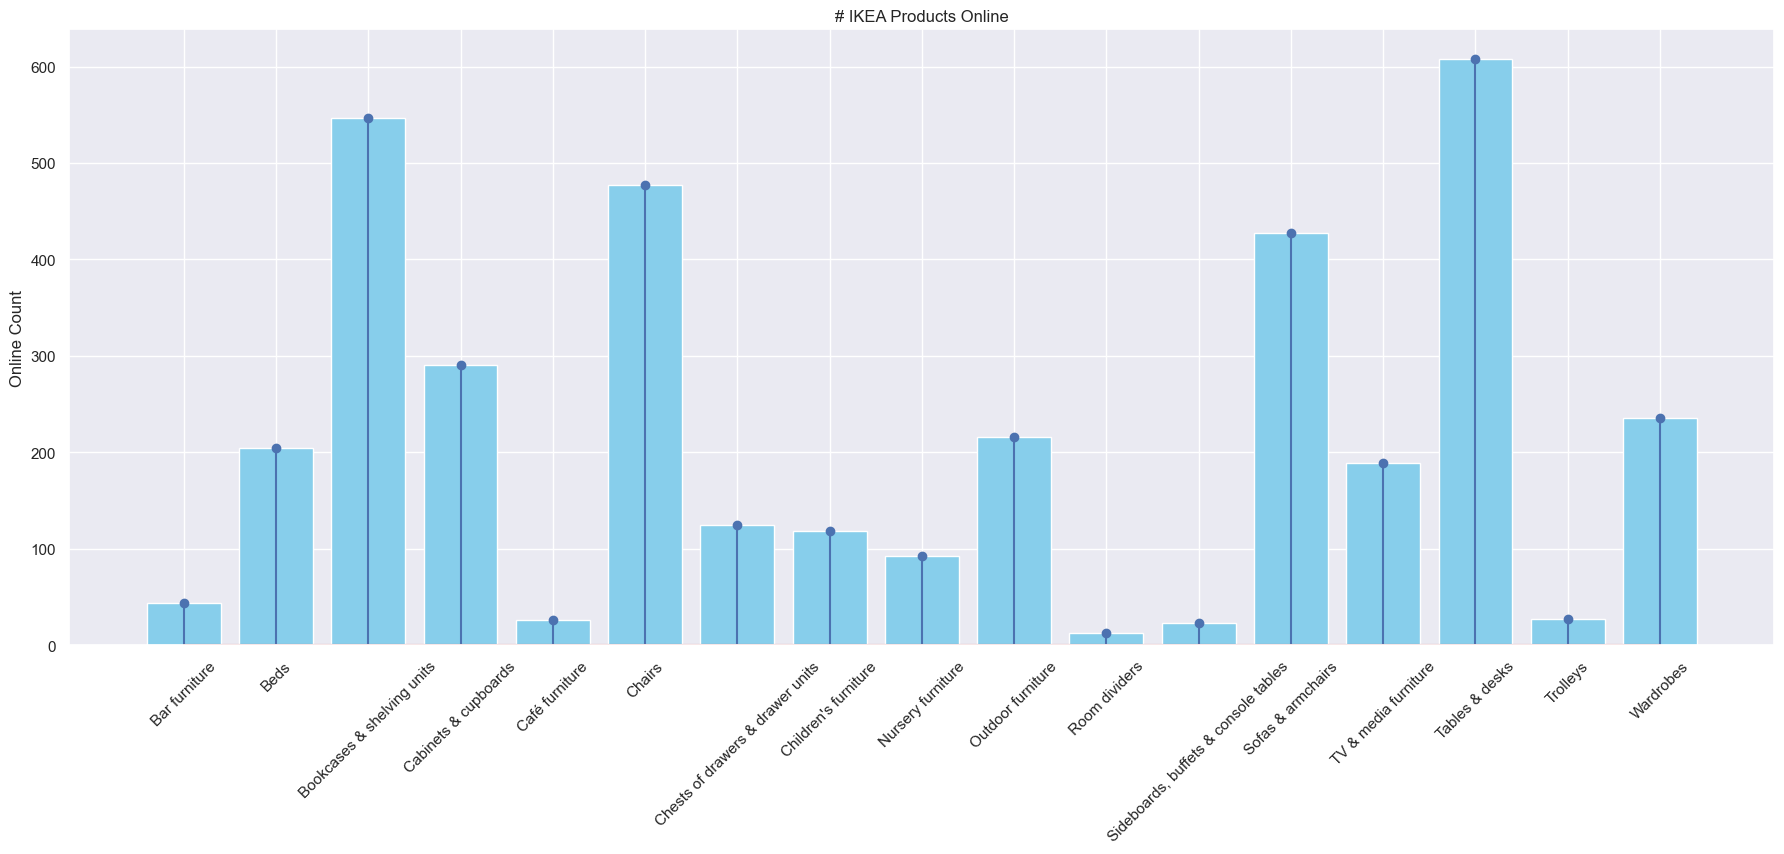

In [78]:
#fig, ax = plt.subplots()
#ax.stem(df.type, df.is_online, use_line_collection=True)
(markers, stemlines, baseline) = plt.stem(df.type, df.is_online)
df_grouped = df.groupby('type')['is_online'].sum().reset_index()
plt.bar(df_grouped['type'], df_grouped['is_online'], color='skyblue')
plt.title("# IKEA Products Online")
plt.xticks(rotation=45)
plt.ylabel("Online Count")
plt.show()



- Among vast range of product categories that IKEA has, only a few products from each category are available online 
- As the graph suggests, only between 0-600 products of different categories are available online out of which products belonging to Booking cases and shelving units, Tables & desks category are available online more in number(490-610 units) than others
- Room Dividers, Cafe Furniture, Slideboards, Buffets & console tables are available very less in number

In [34]:
num_cols = ['oldrate', 'height', 'width', 'price', 'depth']
dff[num_cols] = dff[num_cols].round(2)
# dff.oldrate = dff.oldrate.round(2)
# dff.height = dff.height.round(2)
# dff.width = dff.width.round(2) 
# dff.price = dff.price.round(2)
# dff.depth = dff.depth.round(2)
dff

,type,price,oldrate,depth,height,width
0,Bar furniture,679.55,464.13,50.10,98.62,63.91
1,Beds,1647.43,455.62,65.30,87.46,137.84
2,Bookcases & shelving units,519.42,449.74,39.95,125.41,106.35
3,Cabinets & cupboards,789.02,453.48,40.67,110.92,99.46
4,Café furniture,553.88,458.36,49.21,84.14,63.98
5,Chairs,1048.93,438.30,58.02,86.70,73.49
6,Chests of drawers & drawer units,612.18,457.43,47.39,78.86,76.66
7,Children's furniture,272.76,446.18,46.91,81.27,65.01
8,Nursery furniture,393.66,451.28,46.70,87.08,66.35
9,Outdoor furniture,859.83,441.58,61.04,85.80,91.78


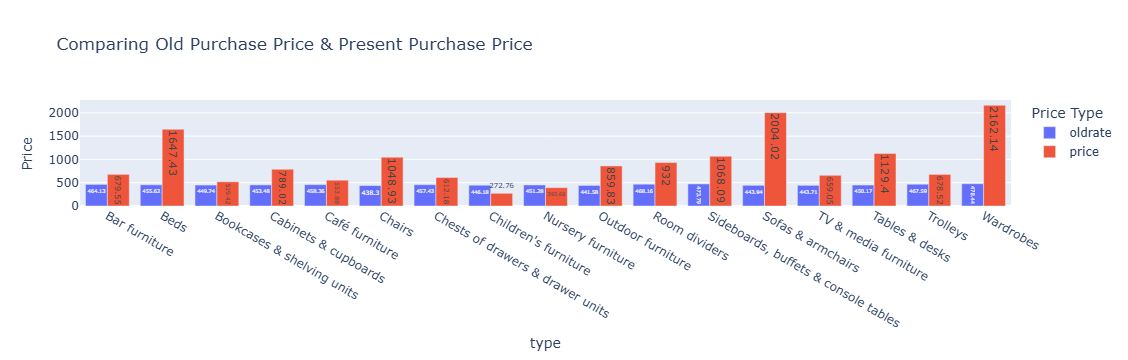

In [79]:
# Melt the dataframe to have a 'Price Type' column
df_melt = dff.melt(id_vars=['type'], value_vars=['oldrate', 'price'], 
                   var_name='Price Type', value_name='Price')

fig = px.bar(
    df_melt,
    x='type',
    y='Price',
    color='Price Type',
    barmode='group',
    text='Price',
    title='Comparing Old Purchase Price & Present Purchase Price'
)

fig.show()

* Average Present Purchase price per unit of Children's Furniture, Nursery Furniture has decreased in comparision with their previous/old prices

* And for other furniture except Children's Furniture and Nursery Furniture the average purchase price per unit has increased especially for Wardrobes

# Looking into the relationship between Product's Measurements and Its Price

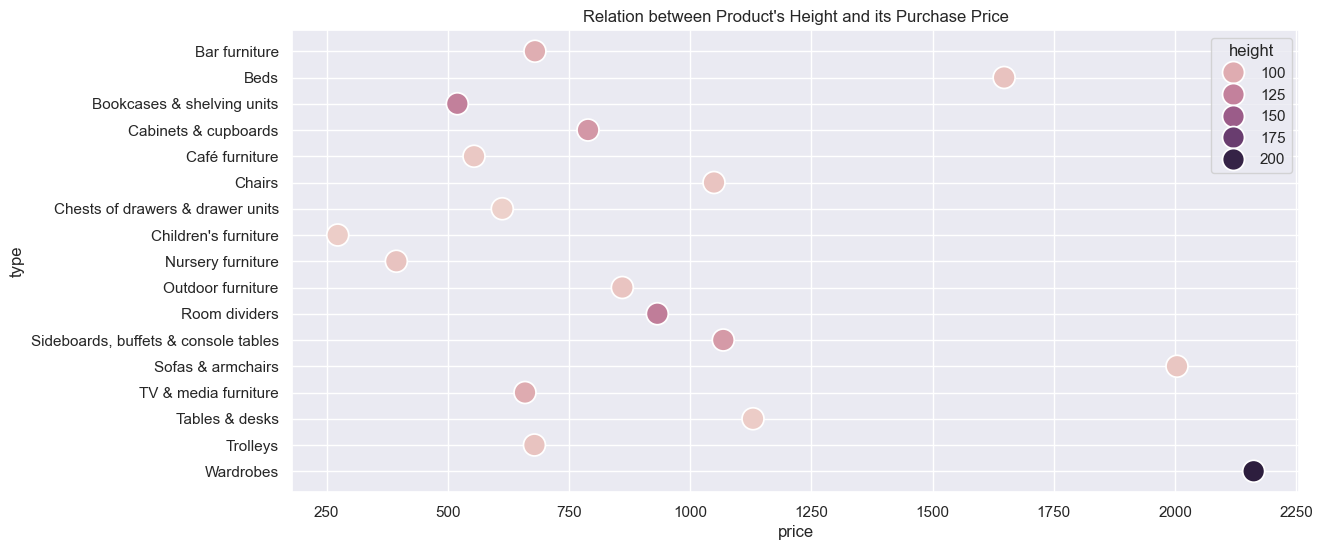

In [36]:
sns.set(rc={'figure.figsize':(13,6)})  # Set figure size before plotting

ax = sns.scatterplot(
    data=dff,
    x="price",
    y="type",
    hue="height",
    s=250  # marker size
)

ax.set_title("Relation between Product's Height and its Purchase Price")
plt.show()

* As we can see from above, the average cost of Children's furniture 250 INR and the average height is 100cm 
* The tallest Furniture Item in IKEA is its Wardrobe which is 200cm i.e, approximately 6 foot tall and costs around 2,250 INR
* It is hard to draw a line of best fit here, as there is very weak negative correlation or no correlation between a product's height and its price

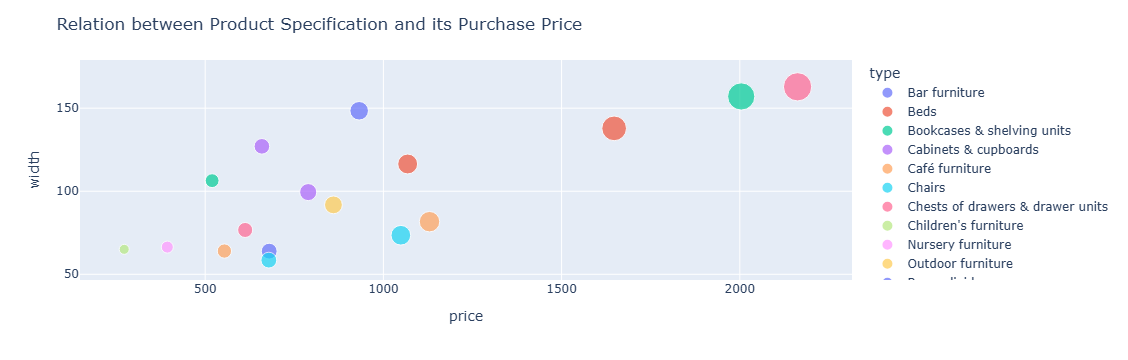

In [80]:
fig = px.scatter(dff, x="price", y="width", color="type", 
                 size='price',
                 hover_data=['height', 'depth'])
fig.update_layout(title_text='Relation between Product Specification and its Purchase Price')
fig.show()

* The correlation is positive and very weak
* For instance, furniture like Beds, come in different measurements, single-cot, double-cot, king-size etc, here, the measurements play an important role; as the price varies according to the size.
* The weak-positive correlation can be applicable here.
* This may not be true for all products until their size/specifications play as a major core feature of the respective product.

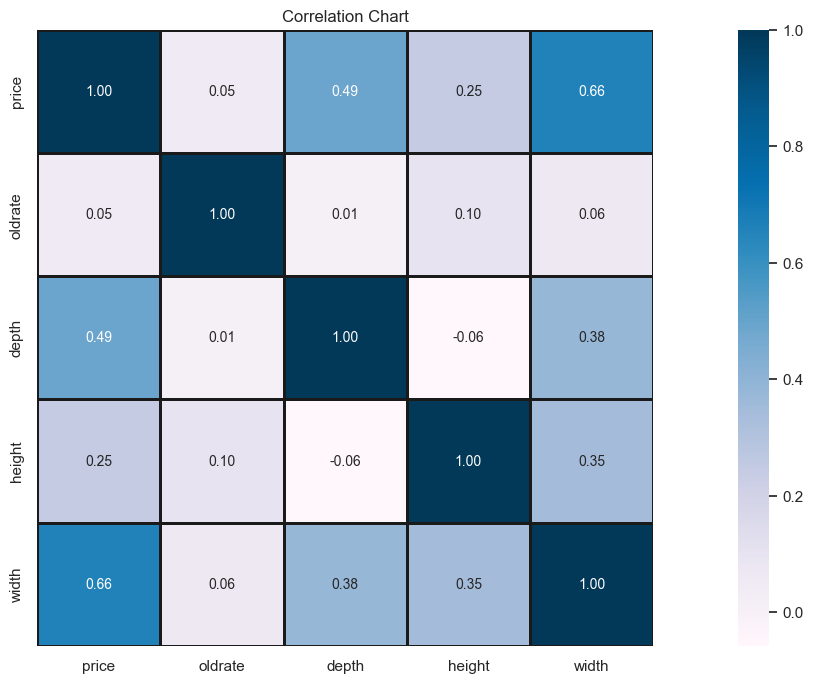

In [81]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix and plot
sns.set(rc={'figure.figsize': (22,8)})
ax = sns.heatmap(numeric_data.corr(), cmap="PuBu", linewidths=2, linecolor="k",
                 square=True, annot=True, fmt=".2f", annot_kws={"size":10})
ax.set_title("Correlation Chart")
plt.show()

* Correlation between product's width, height, depth and its purchase price is weak positive
* This could be especially true for some products in IKEA's range of Furniture products as the product's measurements are one of its it core features. For example, Beds, Wardrobes, Tables & Desks etc.
* Otherwise, their correlation is 0 

# Questions & Answers

**1. List the exact number of IKEA's products in each category**

In [39]:
ash = data.groupby('type')['price'].agg(['count'])  # Group by 'type', count number of prices
dx = ash.reset_index()                              # Convert grouped index back to columns
dx.columns = dx.columns.str.replace('count', 'in_number')  # Rename 'count' to 'in_number'
dx                                                 # Show the resulting DataFrame

,type,in_number
0,Bar furniture,47
1,Beds,208
2,Bookcases & shelving units,548
3,Cabinets & cupboards,292
4,Café furniture,26
5,Chairs,481
6,Chests of drawers & drawer units,125
7,Children's furniture,124
8,Nursery furniture,97
9,Outdoor furniture,216


**Answer :**
* Bar furniture	47
* Beds	208
* Bookcases & shelving units	548
* Cabinets & cupboards	292
* Café furniture	26
* Chairs	481
* Chests of drawers & drawer units	125
* Children's furniture	124
* Nursery furniture	97
* Outdoor furniture	216
* Room dividers	13
* Sideboards, buffets & console tables	23
* Sofas & armchairs	428
* TV & media furniture	190
*	Tables & desks	612
* Trolleys	28
*	Wardrobes	236

**2. Which category of IKEA's Furniture range has minimum online presence?**

In [40]:
cx = pd.merge(dx, df, on = "type", how = "outer")
cx

,type,in_number,price,oldrate,is_online,color_options,depth,height,width
0,Bar furniture,47,31939.0,21814.231746,44,NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,2354.584043,4635.159645,3003.708535
1,Beds,208,342666.0,94769.584127,205,NoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNo...,13581.400269,18192.678492,28669.829630
2,Bookcases & shelving units,548,284640.0,246459.533333,547,NoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYes...,21892.024204,68723.076866,58279.367794
3,Cabinets & cupboards,292,230392.6,132416.457143,291,NoYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesY...,11876.856118,32388.158167,29040.950725
4,Café furniture,26,14401.0,11917.263492,26,NoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNo...,1279.550426,2187.719882,1663.354267
5,Chairs,481,504536.6,210821.088889,477,NoNoYesYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNo...,27906.978037,41703.874353,35346.318519
6,Chests of drawers & drawer units,125,76522.5,57178.546032,125,NoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoN...,5923.516809,9857.359941,9583.000000
7,Children's furniture,124,33822.0,55326.809524,119,NoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoN...,5816.376065,10077.679231,8060.825121
8,Nursery furniture,97,38185.0,43774.349206,93,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo...,4529.755267,8446.839616,6435.883414
9,Outdoor furniture,216,185722.6,95381.796825,216,YesNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoN...,13185.470641,18533.797487,19824.600966


In [41]:
cx['not_online'] = cx['in_number'] - cx['is_online']
cx

,type,in_number,price,oldrate,is_online,color_options,depth,height,width,not_online
0,Bar furniture,47,31939.0,21814.231746,44,NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,2354.584043,4635.159645,3003.708535,3
1,Beds,208,342666.0,94769.584127,205,NoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNo...,13581.400269,18192.678492,28669.829630,3
2,Bookcases & shelving units,548,284640.0,246459.533333,547,NoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYes...,21892.024204,68723.076866,58279.367794,1
3,Cabinets & cupboards,292,230392.6,132416.457143,291,NoYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesY...,11876.856118,32388.158167,29040.950725,1
4,Café furniture,26,14401.0,11917.263492,26,NoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNo...,1279.550426,2187.719882,1663.354267,0
5,Chairs,481,504536.6,210821.088889,477,NoNoYesYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNo...,27906.978037,41703.874353,35346.318519,4
6,Chests of drawers & drawer units,125,76522.5,57178.546032,125,NoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoN...,5923.516809,9857.359941,9583.000000,0
7,Children's furniture,124,33822.0,55326.809524,119,NoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoN...,5816.376065,10077.679231,8060.825121,5
8,Nursery furniture,97,38185.0,43774.349206,93,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo...,4529.755267,8446.839616,6435.883414,4
9,Outdoor furniture,216,185722.6,95381.796825,216,YesNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoN...,13185.470641,18533.797487,19824.600966,0


**Answer :**
* There are around 5 products from Children's Furniture of IKEA which are unavailable online.
* From 124 Children's Furniture products of IKEA, only 119 of them have an online presence.
* This could be because the products might be specialised in nature which are best experienced in-store.

**3. Which products have a strong online presence?**

In [42]:
cx.groupby(['type','in_number','is_online']).sum()

,,,price,oldrate,color_options,depth,height,width,not_online
type,in_number,is_online,,,,,,,
Bar furniture,47,44,31939.0,21814.231746,NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,2354.584043,4635.159645,3003.708535,3
Beds,208,205,342666.0,94769.584127,NoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNo...,13581.400269,18192.678492,28669.829630,3
Bookcases & shelving units,548,547,284640.0,246459.533333,NoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYes...,21892.024204,68723.076866,58279.367794,1
Cabinets & cupboards,292,291,230392.6,132416.457143,NoYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesY...,11876.856118,32388.158167,29040.950725,1
Café furniture,26,26,14401.0,11917.263492,NoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNo...,1279.550426,2187.719882,1663.354267,0
Chairs,481,477,504536.6,210821.088889,NoNoYesYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNo...,27906.978037,41703.874353,35346.318519,4
Chests of drawers & drawer units,125,125,76522.5,57178.546032,NoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoN...,5923.516809,9857.359941,9583.000000,0
Children's furniture,124,119,33822.0,55326.809524,NoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoN...,5816.376065,10077.679231,8060.825121,5
Nursery furniture,97,93,38185.0,43774.349206,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo...,4529.755267,8446.839616,6435.883414,4


**Answer :**
* Cafe Furniture, Chests of drawers & drawer units, Outdoor furniture, Room dividers, Sideboards, buffets & console tables, Wardrobes catogories in IKEA have a strong online presence.
* One of the reasons for these products to have a strong online presence could be their high number of sales and strong demand.

**4. What are the different categories of furniture products IKEA sells?**


In [43]:
df.type

0                            Bar furniture
1                                     Beds
2               Bookcases & shelving units
3                     Cabinets & cupboards
4                           Café furniture
5                                   Chairs
6         Chests of drawers & drawer units
7                     Children's furniture
8                        Nursery furniture
9                        Outdoor furniture
10                           Room dividers
11    Sideboards, buffets & console tables
12                       Sofas & armchairs
13                    TV & media furniture
14                          Tables & desks
15                                Trolleys
16                               Wardrobes
Name: type, dtype: object

IKEA sells **17 different furniture products** ranging from Bar Furniture to the Nursery Furniture

Below is the detailed list of Furniture IKEA sells,
* Bar furniture
* Beds
* Bookcases & shelving units
* Cabinets & cupboards
* Café furniture
* Chairs
* Chests of drawers & drawer units
* Children's furniture
* Nursery furniture                        
* Outdoor furniture
* Room dividers
* Sideboards, buffets & console tables
* Sofas & armchairs
* TV & media furniture
* Tables & desks                                
* Trolleys
* Wardrobes

**5. How many of IKEA's products are available online?**

In [44]:
data1

,price,oldrate,is_online,color_options,depth,height,width
type,,,,,,,
Bar furniture,31939.0,21814.231746,44,NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNo...,2354.584043,4635.159645,3003.708535
Beds,342666.0,94769.584127,205,NoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNo...,13581.400269,18192.678492,28669.829630
Bookcases & shelving units,284640.0,246459.533333,547,NoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYes...,21892.024204,68723.076866,58279.367794
Cabinets & cupboards,230392.6,132416.457143,291,NoYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesY...,11876.856118,32388.158167,29040.950725
Café furniture,14401.0,11917.263492,26,NoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNo...,1279.550426,2187.719882,1663.354267
Chairs,504536.6,210821.088889,477,NoNoYesYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNo...,27906.978037,41703.874353,35346.318519
Chests of drawers & drawer units,76522.5,57178.546032,125,NoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoN...,5923.516809,9857.359941,9583.000000
Children's furniture,33822.0,55326.809524,119,NoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoN...,5816.376065,10077.679231,8060.825121
Nursery furniture,38185.0,43774.349206,93,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo...,4529.755267,8446.839616,6435.883414


In [45]:
data1.is_online.sum()

np.int64(3666)

* Out of 3,694 furniture products of 17 different categories, only **3,666** of them have an online presence/are sold online.
* Meaning that 28 poducts are just sold in offline stores.
* One of the primary reasons could be that these products are obsolete in nature or customers prefer to trial and buy these products in-person.

**7. Which products' current purchase prices is lower than that of their previous ones?**

In [46]:
dff[dff.price < dff.oldrate]

,type,price,oldrate,depth,height,width
7,Children's furniture,272.76,446.18,46.91,81.27,65.01
8,Nursery furniture,393.66,451.28,46.70,87.08,66.35


**Answer :**
* Present Purchase Prices of **Children's Furniture and Nursery Furniture** are lower than their Previous Purchase Prices.
* One of the reasons for this could be their obsolocence or little/no demand.

**8. Which of the product categories achieved maximum increase in their selling price in comparision to their Previous purchase price?**

##### Adding a column to the data and plotting for better understanding

In [47]:
dff['PurchasePriceDifference'] = dff.price - dff.oldrate

In [48]:
dff.groupby(['PurchasePriceDifference','type']).min()

,,price,oldrate,depth,height,width
PurchasePriceDifference,type,,,,,
-173.42,Children's furniture,272.76,446.18,46.91,81.27,65.01
-57.62,Nursery furniture,393.66,451.28,46.70,87.08,66.35
69.68,Bookcases & shelving units,519.42,449.74,39.95,125.41,106.35
95.52,Café furniture,553.88,458.36,49.21,84.14,63.98
154.75,Chests of drawers & drawer units,612.18,457.43,47.39,78.86,76.66
210.93,Trolleys,678.52,467.59,52.90,87.13,58.50
215.34,TV & media furniture,659.05,443.71,42.32,100.32,127.02
215.42,Bar furniture,679.55,464.13,50.10,98.62,63.91
335.54,Cabinets & cupboards,789.02,453.48,40.67,110.92,99.46


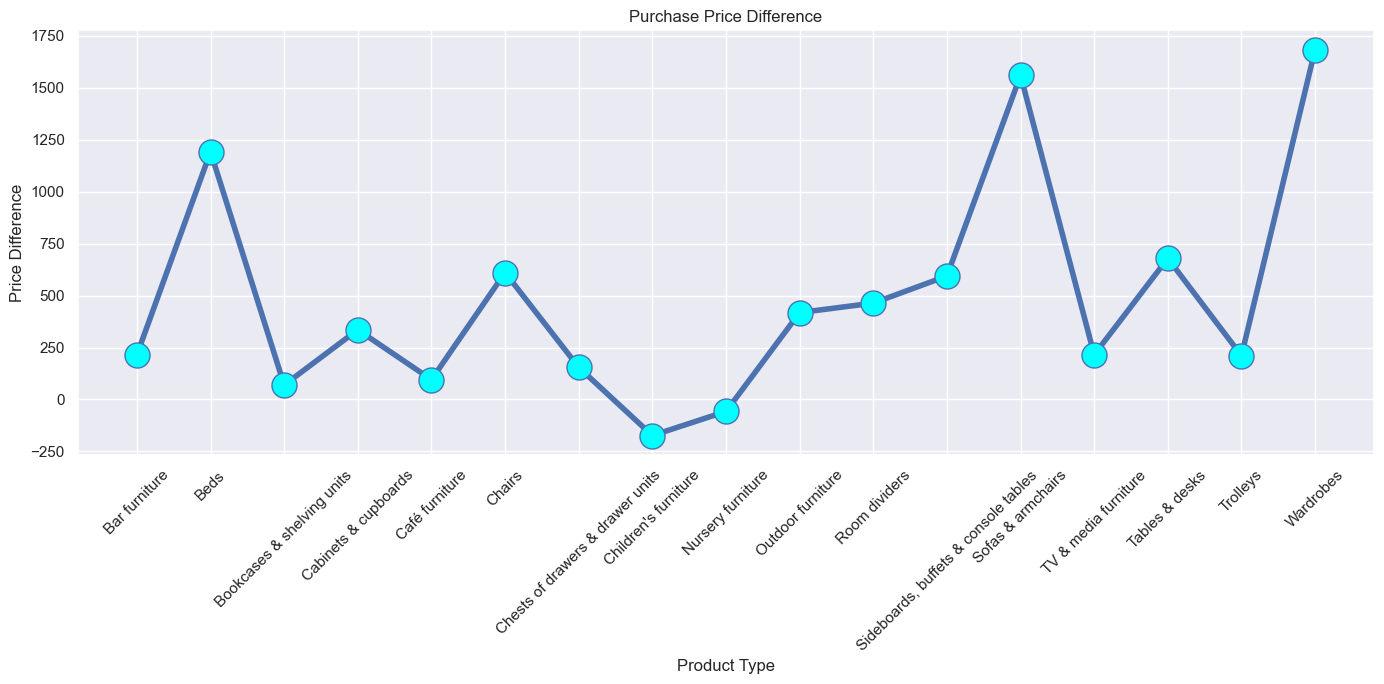

In [49]:
plt.figure(figsize=(14,7))  # set a bigger figure size
plt.plot(
    dff.type,
    dff.PurchasePriceDifference,
    'b-o',              # blue line with circle markers
    lw=4,
    markersize=18,
    markerfacecolor='cyan'
)
plt.title("Purchase Price Difference")
plt.xlabel("Product Type")
plt.ylabel("Price Difference")
plt.xticks(rotation=45)
plt.tight_layout()  # adjust layout so labels don't get cut off
plt.show()

Alternatively, It can be analysed through GroupBy() function too

In [50]:
dff.groupby(['price', 'type']).agg({'oldrate': ['min']})

,,oldrate
,,min
price,type,
272.76,Children's furniture,446.18
393.66,Nursery furniture,451.28
519.42,Bookcases & shelving units,449.74
553.88,Café furniture,458.36
612.18,Chests of drawers & drawer units,457.43
659.05,TV & media furniture,443.71
678.52,Trolleys,467.59
679.55,Bar furniture,464.13


**Answer :** 
- IKEA's Wardrobes have acheived highest price increase in its purchase price in comparision to its previous purchase price.
- There could be an increase in Wardrobes' (making) costs with a proportionate increase in its demand considering the general inflation rate.

# Conclusion

* IKEA has 3,694 products specialising in 17 different furniture categories out of which its Wardrobes, Sofas & Armchairs, Tables and Desks bear a high purchase price in comparision to their older rates.
* Nearly out of 3,694, products 3,666 are available and sold online. Although only 1512 of them have color options to choose from.
* For some products, like Beds, Wardrobes, Sofas & Armchairs, Cafe Furniture, Room dividers, specification especially, its height, depth and breadth, play a crucial role in deciding the costs. Most of the customers look for the specifications of the products before exercising their buying power.
This explains the weak positive correlation between the price of the product and its measurements/specifications.
* In IKEA's broad range of furniture products, the purchase price of all the products has fairly increased except Children's Furniture & Nursery Furniture which might have had gone obsolete with growing change in consumer's preferences/lifestyle & behaviour.

---

## automated data analysis packages 
* pandas-profiling
* dtale
* Gsweetviz